<h1 align="center"><strong>Exploratory Data Analysis</strong> for Breast Cancer Wisconsin Dataset</h1>

## Dataset Source

[Kaggle: Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

# Importing Necessary Libraries

In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Read the Data

In [13]:
df = pd.read_csv("../data/data.csv")  

# view first 5 rows of data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In the output above, theres an extra column named **'Unnamed: 32'**.

This happened because there's an extra column in the csv file.

In the cell below, we delete this unnecessary column.

Also you can see in the data that we have **diagnosis** column with the values **M (malignent)** and **B (benign)**. 

**id** column doesn't have any valuable information for us. 

Rest of the columns describe the tumor.

In [14]:
df = df.drop(columns=["Unnamed: 32"], errors="ignore")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# General Information About the Dataset

In [20]:
# dataset shape
df.shape

(569, 32)

In [25]:
# check empty values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [26]:
# class distribution
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

you can see that the **distribution of target variable is not balanced**

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2278384416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='Set2')


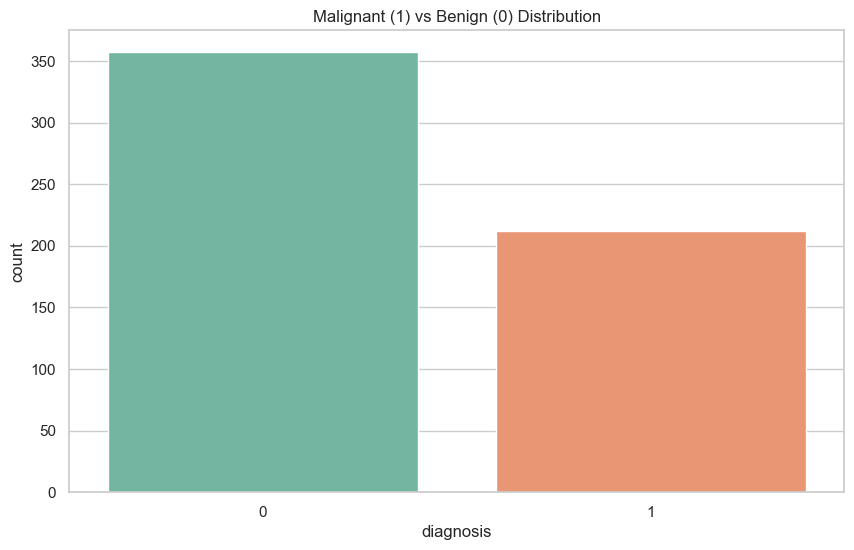

In [31]:
# visualization of class balance
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title("Malignant (1) vs Benign (0) Distribution")
plt.show()

In [15]:
# general info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Based on the otput above we can see that **there are no empty values**

Most columns are **numerical**

Numerical columns can be grouped by:
- **mean:** texture_mean, perimeter_mean etc. (average measurements)
- **se:** radius_se, texture_se etc. (standard error of measurement)
- **worst:** perimeter_worst, area_worst etc. (worst or largest measurements)

In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

- **diagnosis** is our target variable:
    - M for Malignant
    - B for Benign

- **smoothness_mean** is how smooth the edges are

- **compactness_mean** (Perimeter² / Area - 1.0): this tells us how tightly the tumor is shaped, more compact shape means edges are closer and smoother 

- **concavity_mean** shows how deeply the tumor edges bend inward. The more it curves inward, the more serious or sharp those bends are.

- **concave points_mean** is number of concave portions

- **symmetry_mean** is symmetry of the tumor (how mirror-like its shape is)

- **fractal_dimension_mean** measures how complicated or detailed the edges of the tumor are. It checks if the pattern repeats in small and large parts, like how tree branches look similar at different sizes.

- **se (standard error)** for example: radius_se, perimeter_se, area_se. standard error of these measurements

- **worst**
    - **radius_worst**: max measured radius of the tumor
    - **concavity_worst, concave points_worst**: max severity and number of concave parts
    - **area_worst, perimeter_worst etc.**: extremes of the same measurement

# Descriptive Statistics

In [27]:
desc = df.describe().T
desc["skewness"] = df.skew()
desc["kurtosis"] = df.kurt()

desc

TypeError: could not convert string to float: 'M'

the error above happened beacuse diagnosis column is not numerical, in the next cell we solve this error

In [28]:
# converting 'diagnosis' column to numeric (malignant=1, benign=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
# descriptive statistics again
desc = df.describe().T
desc["skewness"] = df.skew()
desc["kurtosis"] = df.kurt()

desc

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08,6.473752,42.193194
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.528461,-1.726811
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01,0.942380,0.845522
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01,0.650450,0.758319
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02,0.990650,0.972214
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03,1.645732,3.652303
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01,0.456324,0.855975
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01,1.190123,1.650130
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01,1.401180,1.998638
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01,1.171180,1.066556


based on the output above:
- big range differences
    - **area_mean**: Min = 143.5, Max = 2501.0
    - **perimeter_mean**: Min = 43.79, Max = 188.5
    - **radius_mean**: Min = 6.98, Max = 28.11
- small range differences:
    - **smoothness_mean, compactness_mean, concavity_mean**: between 0 - 0.4
- columns with 0 values:
    - **concavity_mean, concave points_mean, concavity_worst, and concave points_worst**: means that some tumors have no concavity
- skewness and kurtosis:
    - most columns have **positive skewness**, which means there are more **extreme higher values**
    - **high kurtosis values** for example **area_mean**, which means these columns have more **outliers**

# Correlation Heatmap

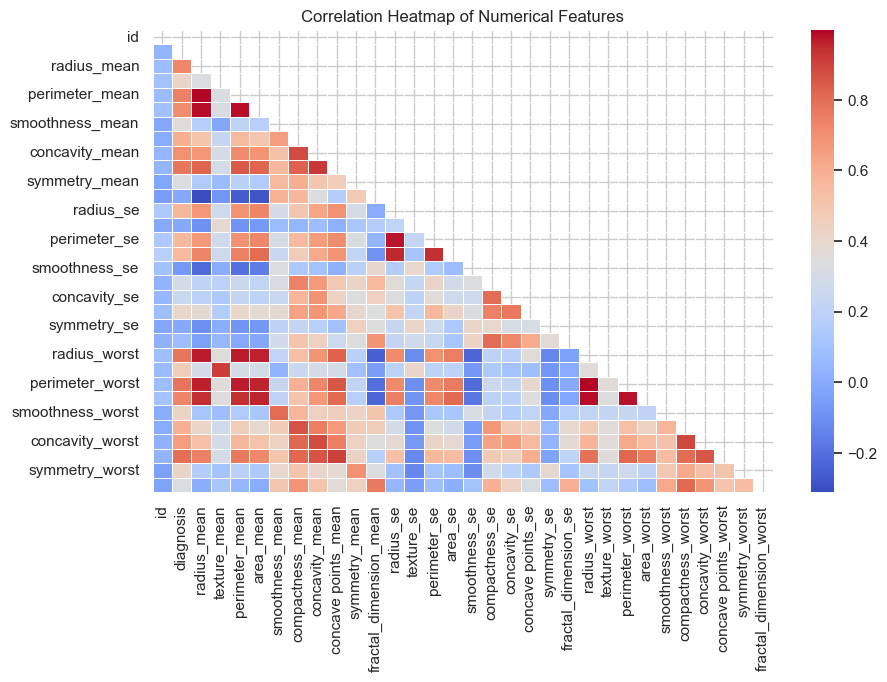

In [34]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

from the output above:
- **radius_mean, perimeter_mean, and area_mean** are strongly positive correlated
- **radius_worst, perimeter_worst, and area_worst** are also highly correlated
- some features related to the size of the tumor are correlated (**radius, area, perimeter**)
- features like **smoothness, symmetry, and fractal_dimension** are not correlated much with other features

# More Visualizations

## Pair Plot

A pairplot is a grid of scatterplots and histograms/KDE plots on the diagonal that shows **pairwise relationships between multiple features**

### What This Pairplot Shows:
- **Axes**: Each row and column represents one of the selected numerical features: 
    - **radius_mean, texture_mean, area_mean, smoothness_mean, compactness_mean**
- **Diagonal**:
    - These are histograms that show **distributions of each feature**
    - Plots are split by diagnosis category (M = Malignant, B = Benign) with different colors.
-  **Off-diagonal**:
    - These are scatterplots showing the **relationship between two variables**
    - Each dot is a patient (observation), and its color shows the diagnosis class.

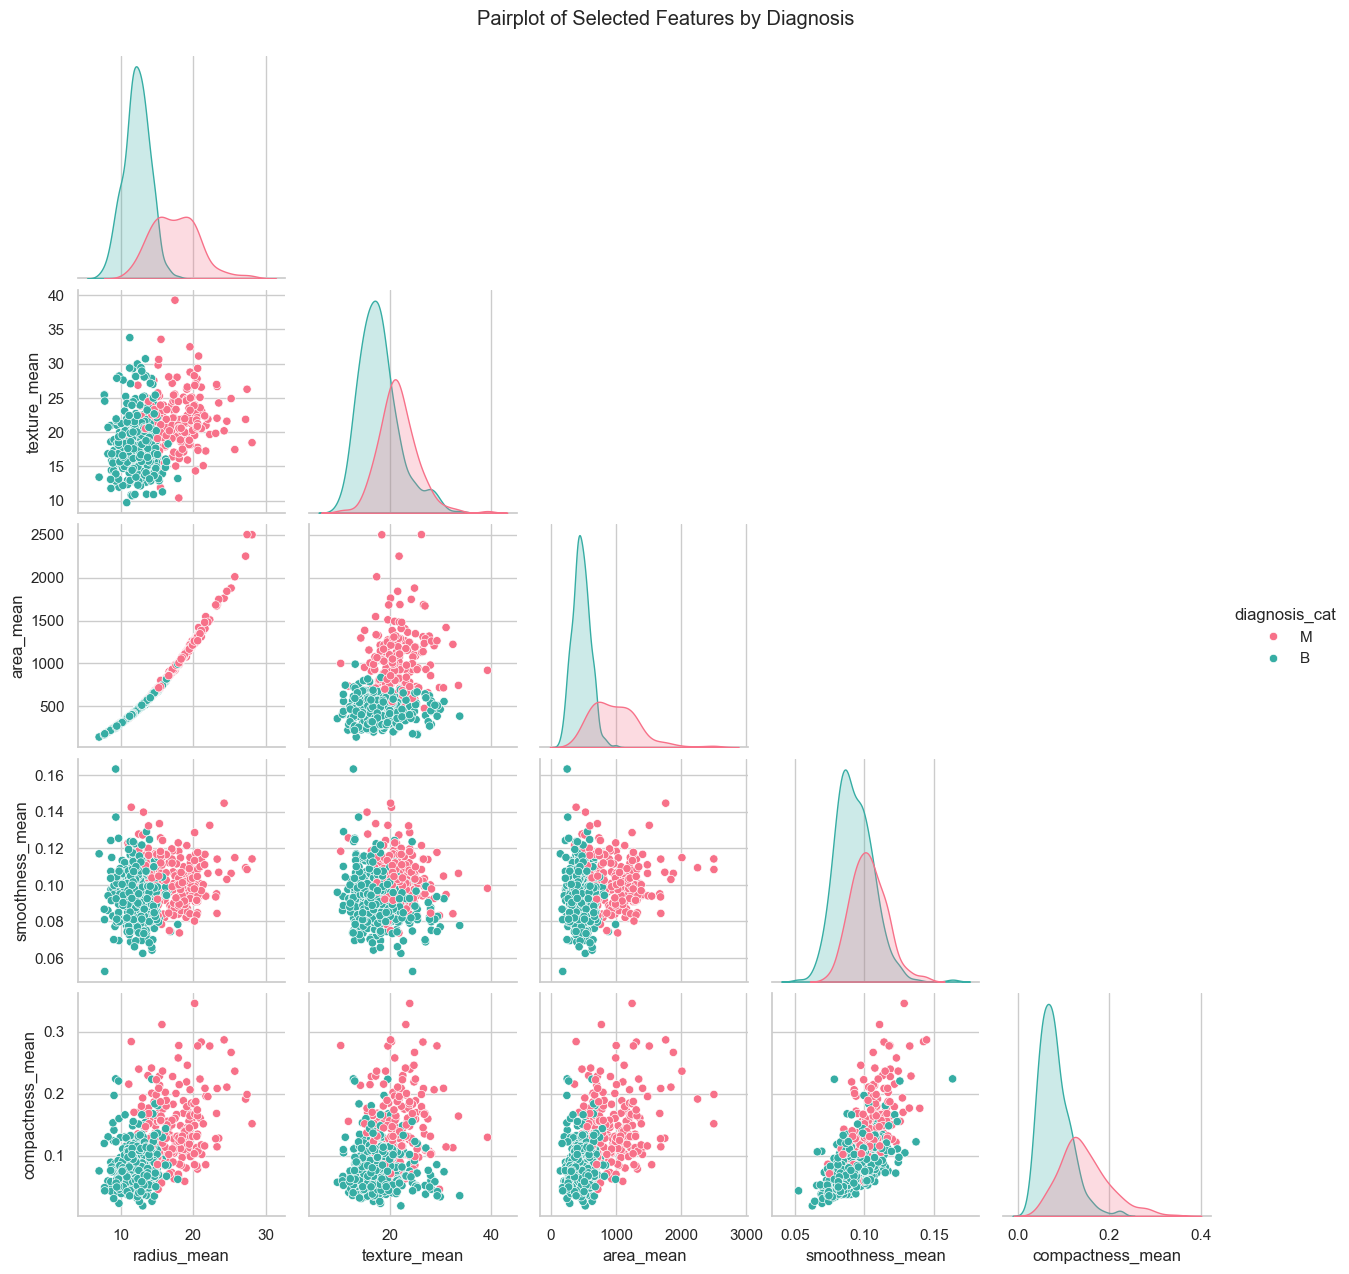

In [37]:
# columns to visualize
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']

# convert diagnosis back to categorical string for visualization
df['diagnosis_cat'] = df['diagnosis'].map({1: 'M', 0: 'B'})
sns.pairplot(df[selected_features + ['diagnosis_cat']], hue='diagnosis_cat', palette="husl", corner=True)
plt.suptitle("Pairplot of Selected Features by Diagnosis", y=1.02)
plt.show()

based on the output above:
1. class seperation:
    - radius, area and, compactness for benign and malignant are apart from each other
    - malignant (M) tumors have bigger radius and area and they are higher in compactness
2. correlation:
    - **radius and area are positively correlated** (scatterplot shows a diagonal line)
    - smoothness and compactness also are a little bit correlated
3. distinctness:
    - values of **malignant and benign is more similar (less distinct) in texture and smoothness**, they overlap a lot
4. skewness:
    - benign cases are more **right skewed** than others in **area and compactness**
    - this means that malignant tumers have larger area and their compactness values are higher in usual

## Distribution Plot

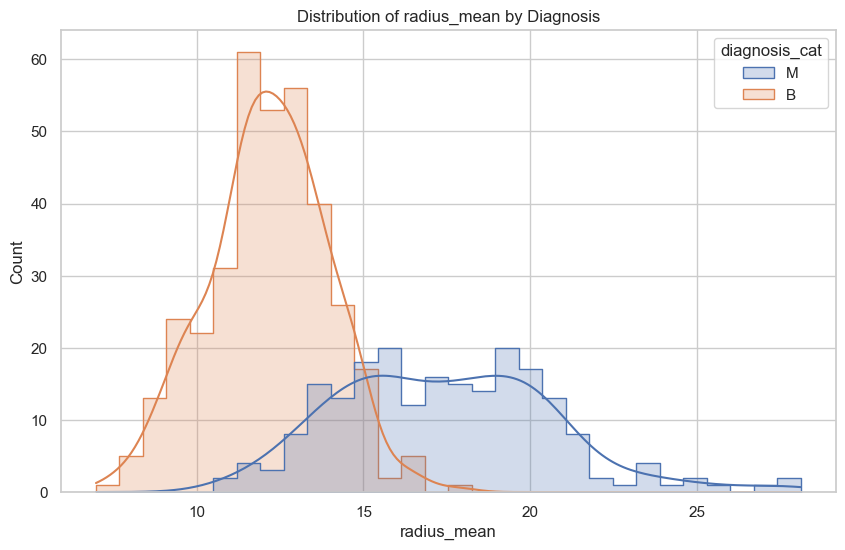

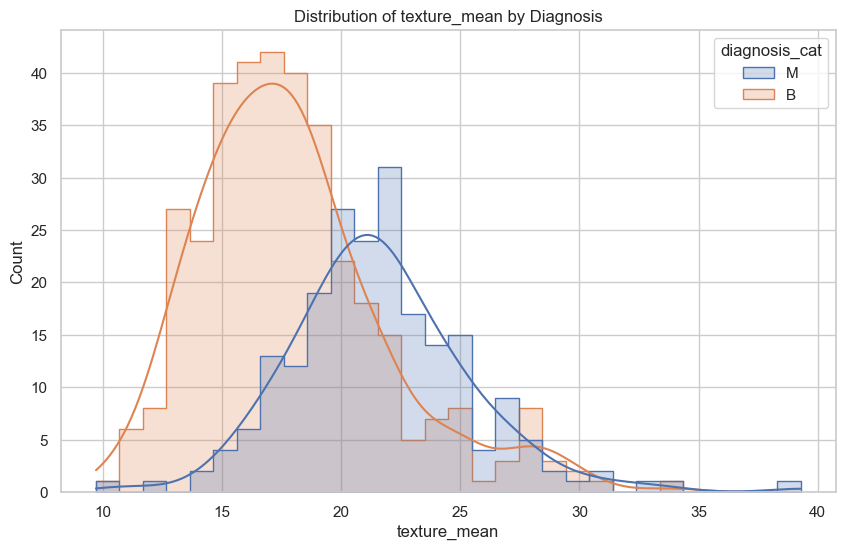

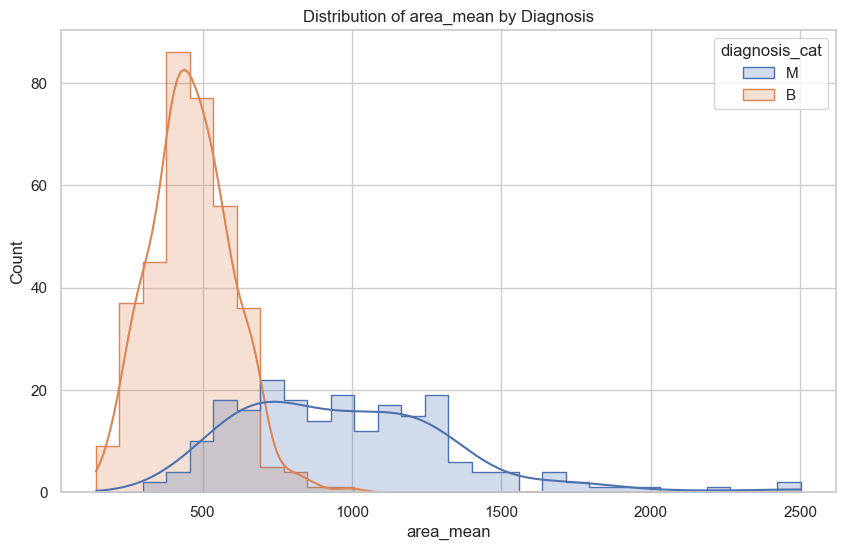

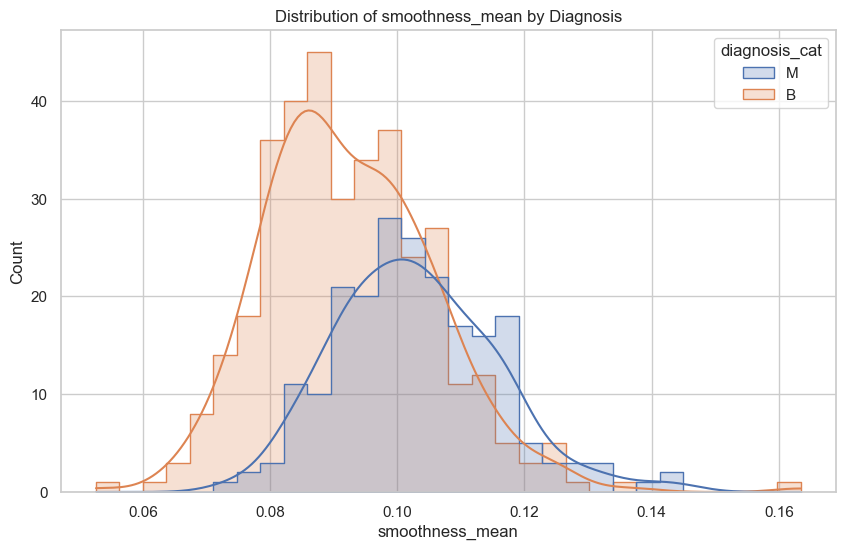

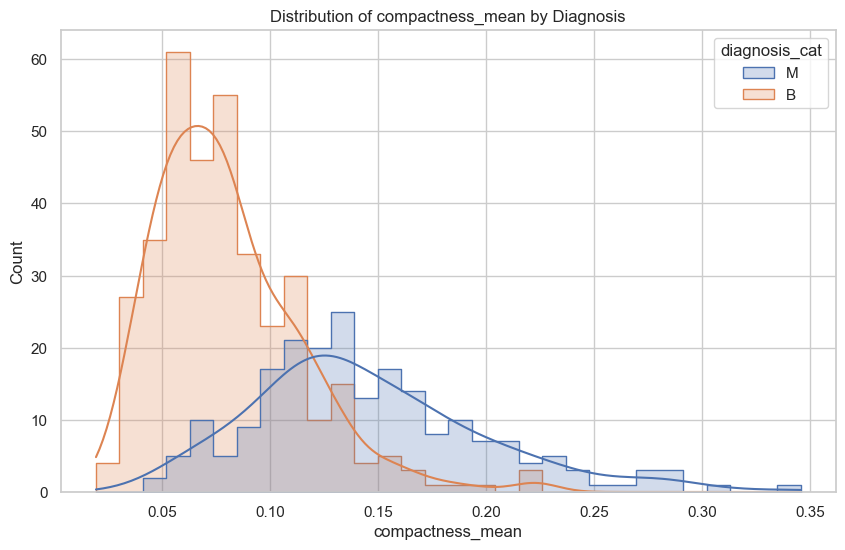

In [38]:
for col in selected_features:
    sns.histplot(data=df, x=col, hue='diagnosis_cat', kde=True, bins=30, element="step")
    plt.title(f"Distribution of {col} by Diagnosis")
    plt.show()

## Boxplot

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\1391527262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette="Set3")


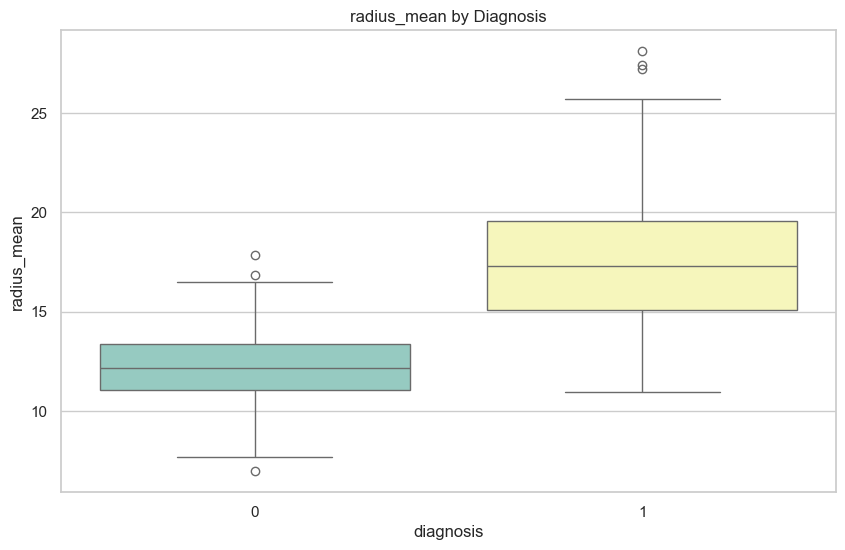

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\1391527262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette="Set3")


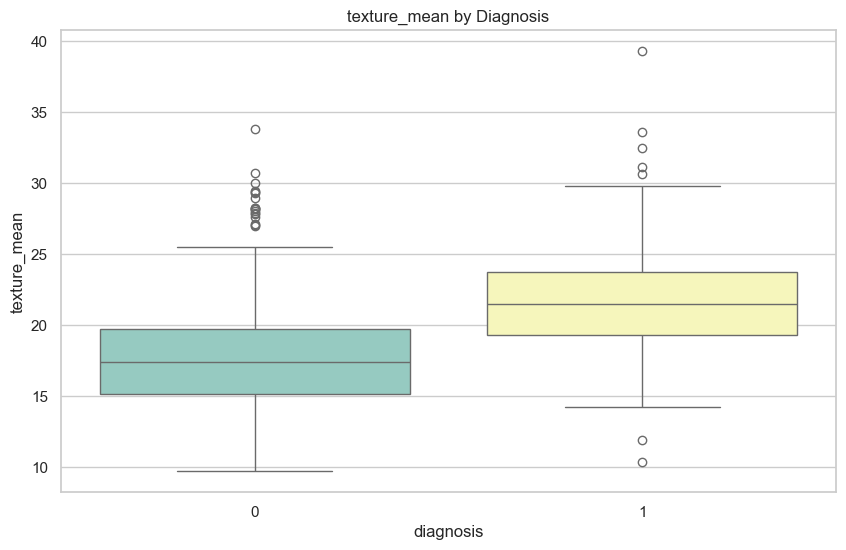

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\1391527262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette="Set3")


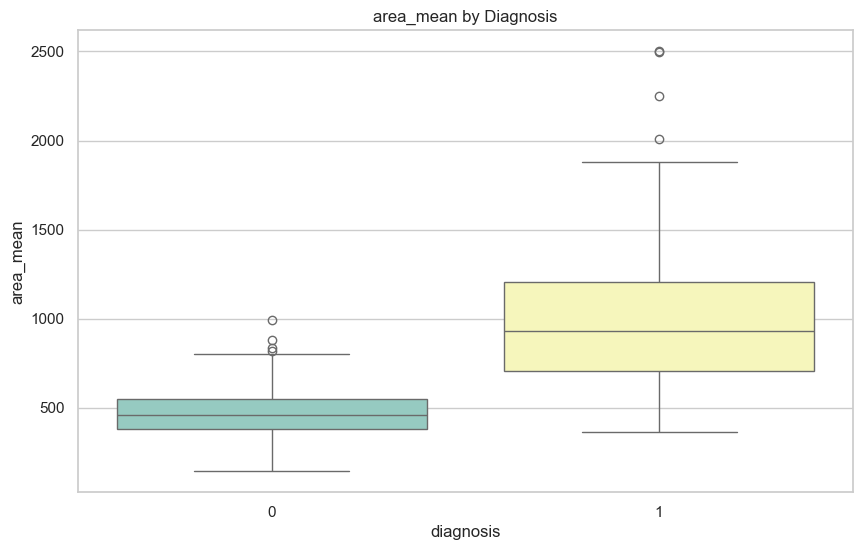

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\1391527262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette="Set3")


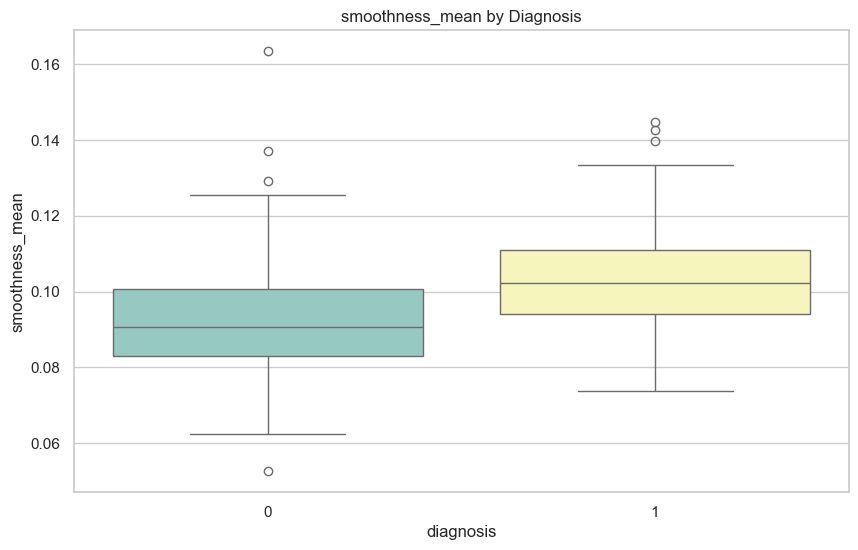

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\1391527262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette="Set3")


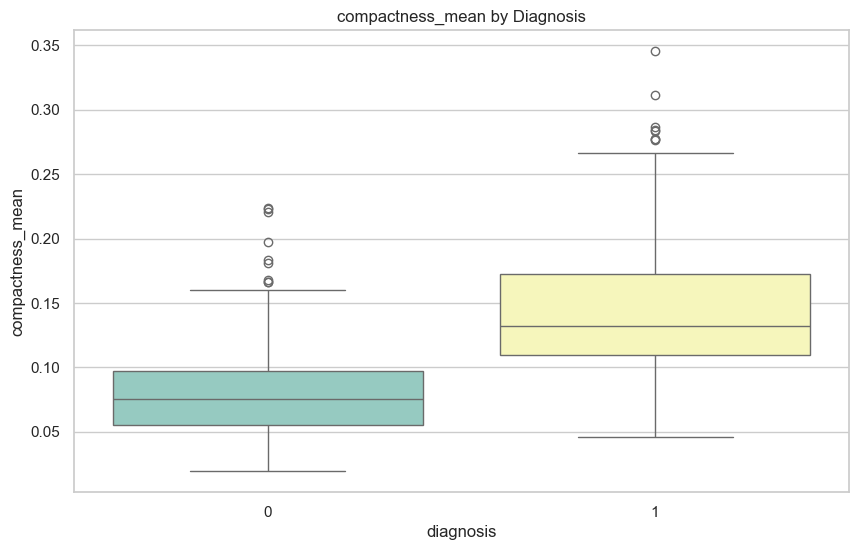

In [39]:
for col in selected_features:
    sns.boxplot(x='diagnosis', y=col, data=df, palette="Set3")
    plt.title(f"{col} by Diagnosis")
    plt.show()

## Violin Plot

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2943409742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette="Pastel2")


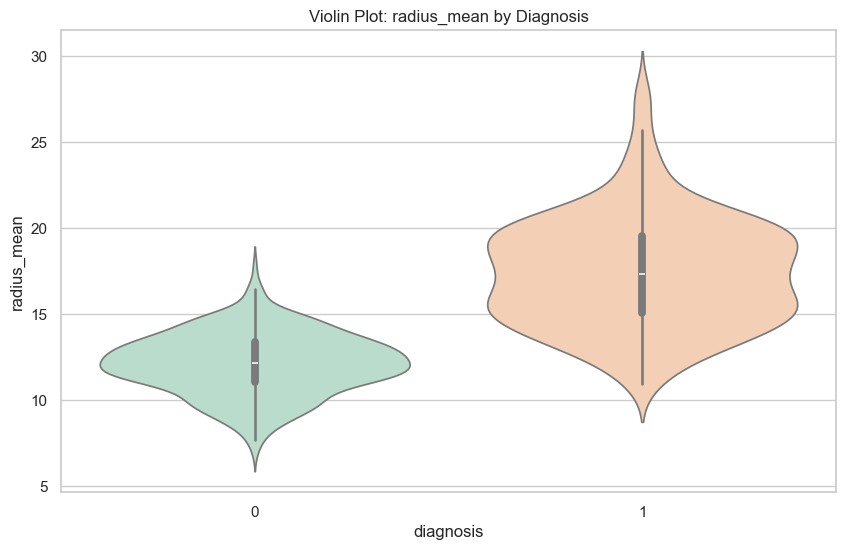

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2943409742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette="Pastel2")


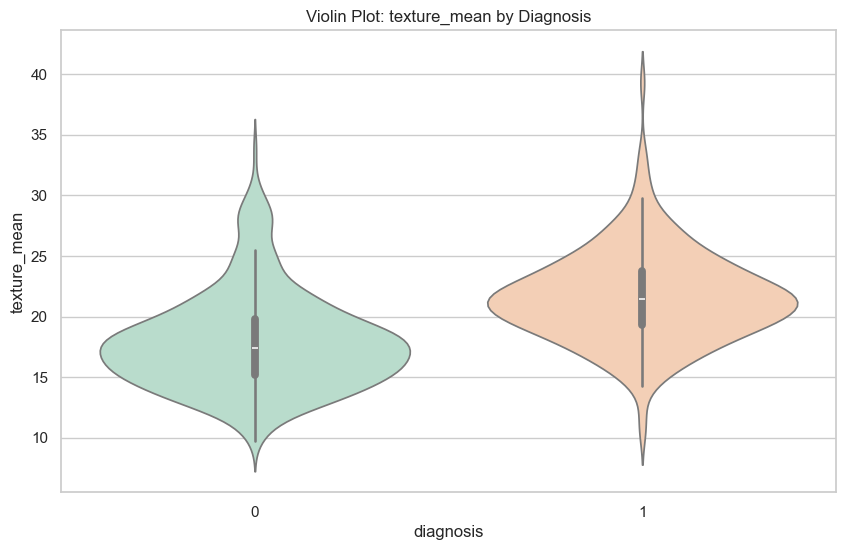

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2943409742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette="Pastel2")


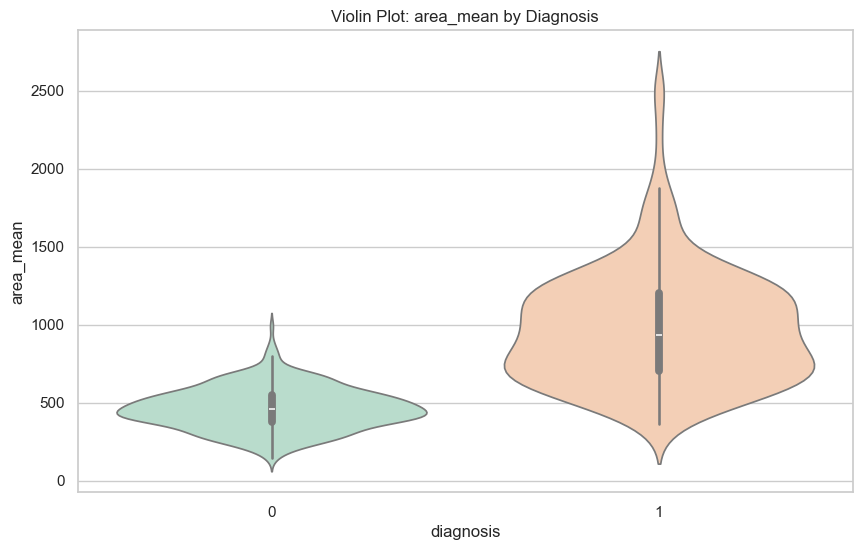

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2943409742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette="Pastel2")


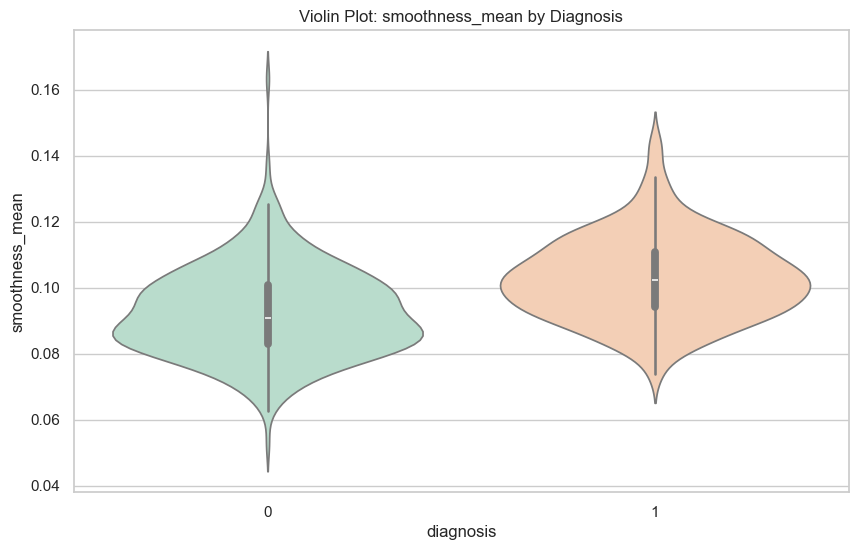

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2943409742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=col, data=df, palette="Pastel2")


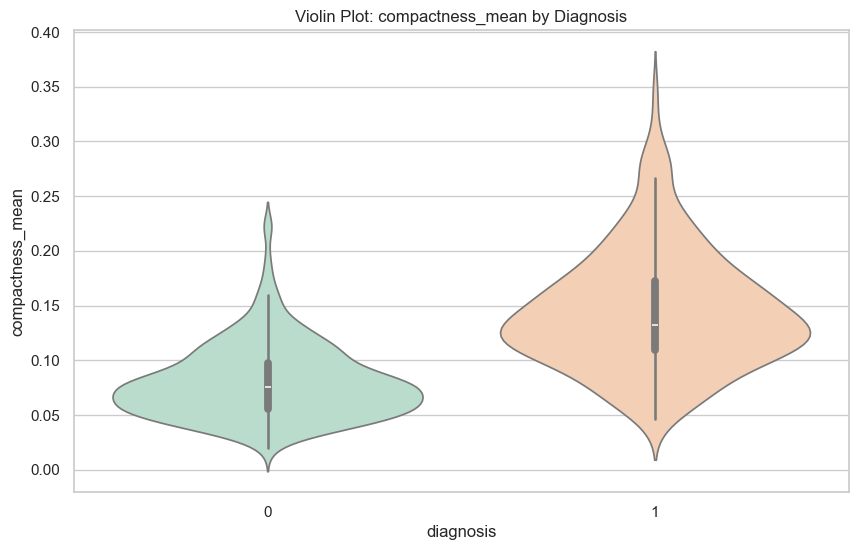

In [40]:
for col in selected_features:
    sns.violinplot(x='diagnosis', y=col, data=df, palette="Pastel2")
    plt.title(f"Violin Plot: {col} by Diagnosis")
    plt.show()

- area_mean:
    - it seems that malignant tumors have larger average area values than benign tumors
    - distribution for malignant is more spread out, benign distribution is more compact
- texture_mean:
    - theres not much difference in bening and malignant in texture
    - generally malignant tumors have higher average texture value than benign tumors

## Swarmplot

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\3086652070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y=col, data=df, palette="Pastel2")


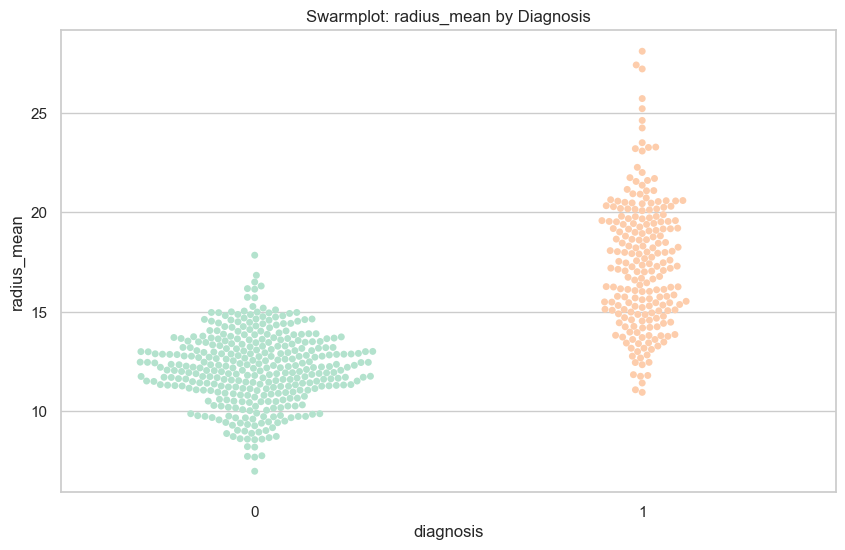

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\3086652070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y=col, data=df, palette="Pastel2")


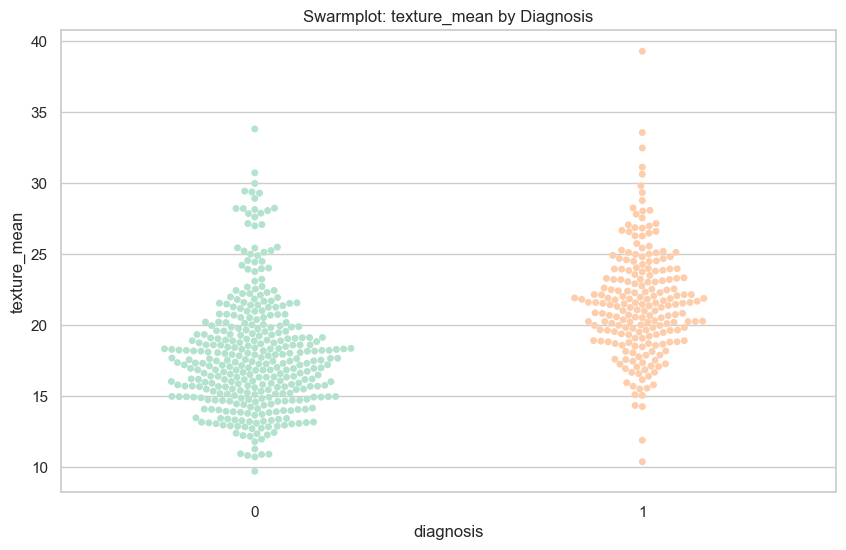

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\3086652070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y=col, data=df, palette="Pastel2")


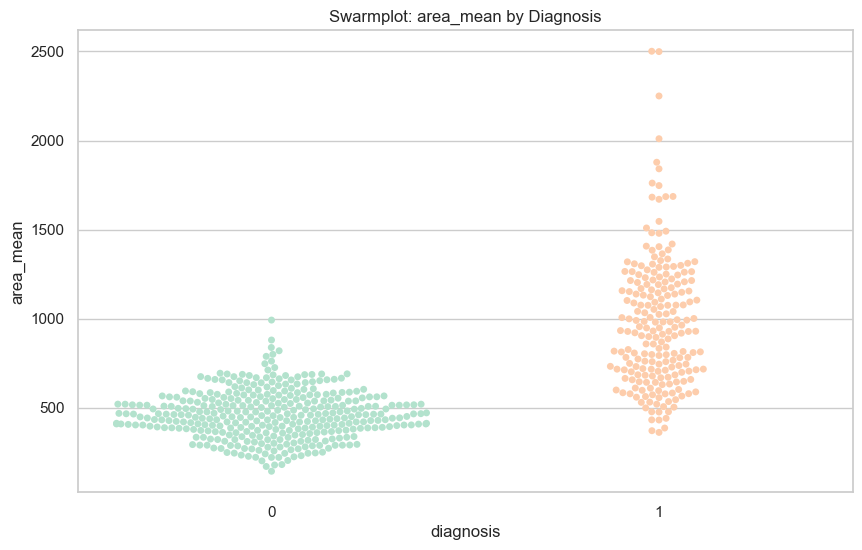

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\3086652070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y=col, data=df, palette="Pastel2")


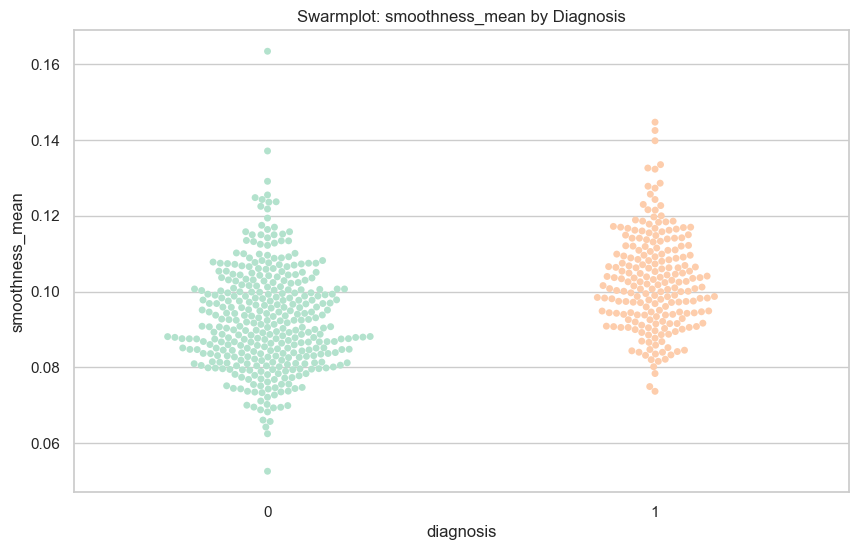

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\3086652070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y=col, data=df, palette="Pastel2")


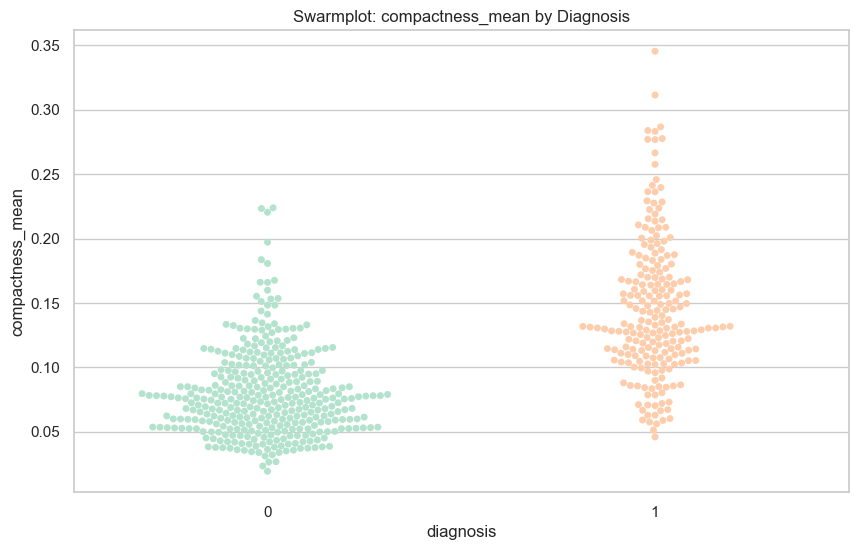

In [42]:
for col in selected_features:
    sns.swarmplot(x='diagnosis', y=col, data=df, palette="Pastel2")
    plt.title(f"Swarmplot: {col} by Diagnosis")
    plt.show()

#  KDE Plot

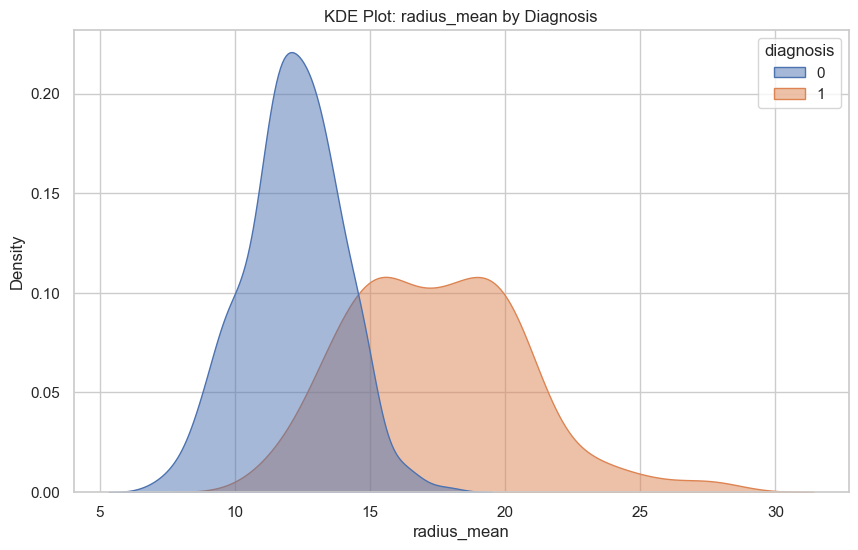

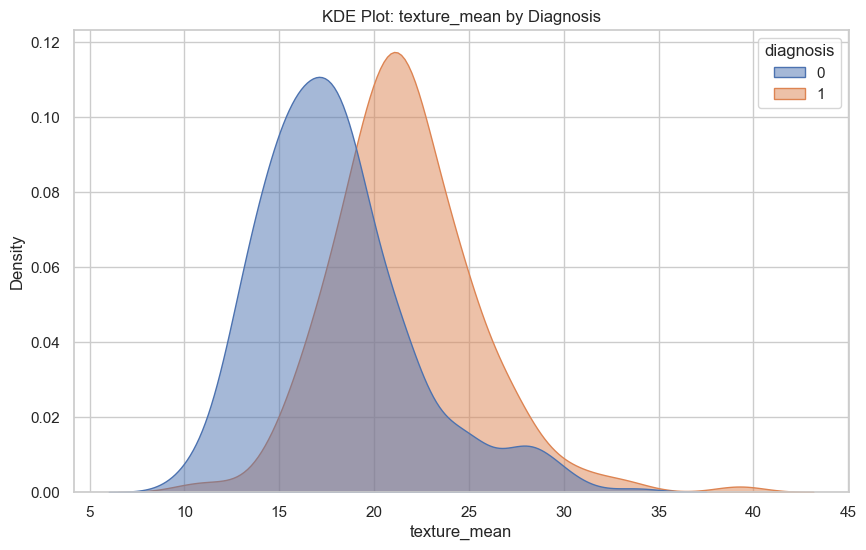

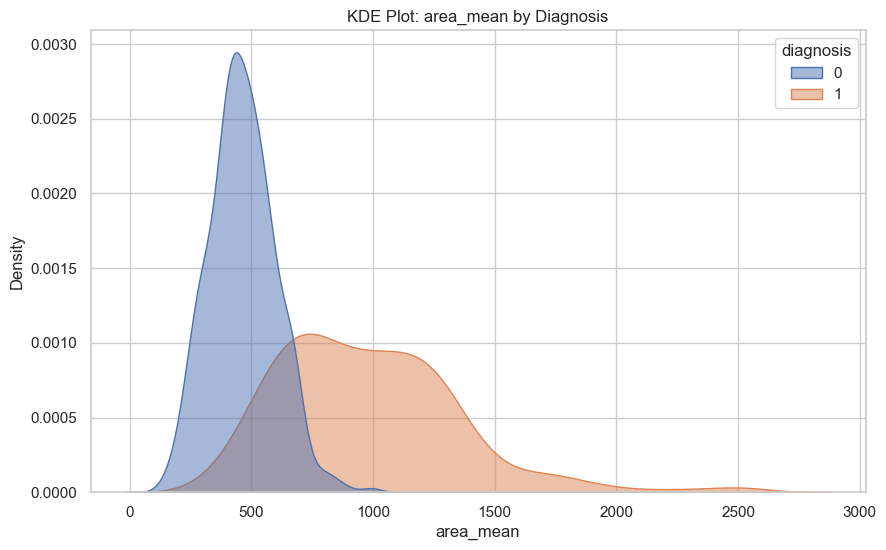

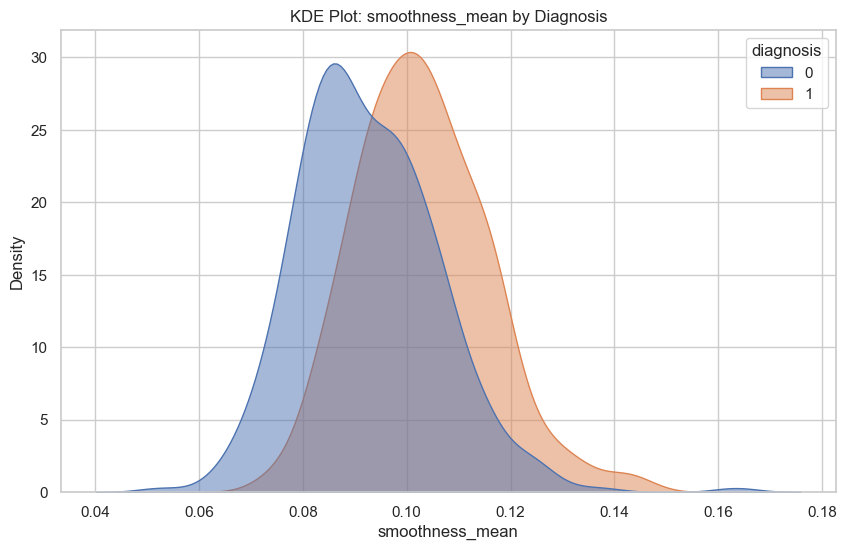

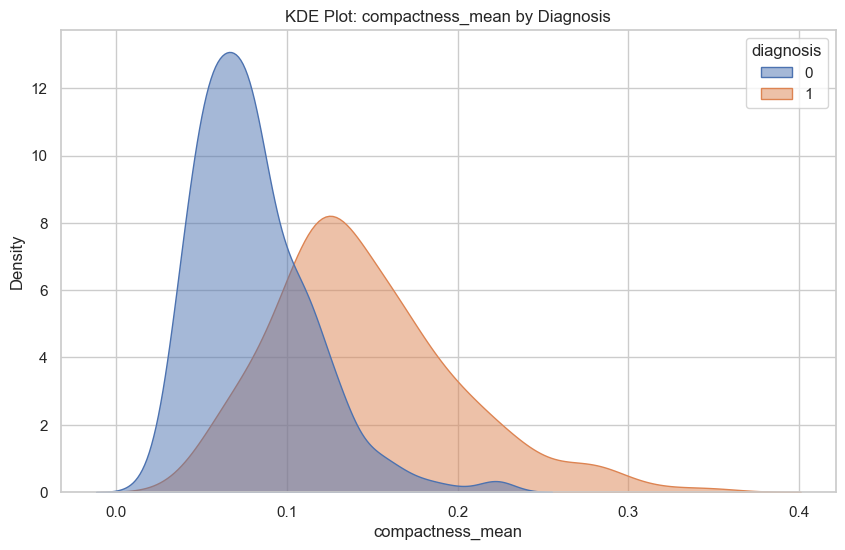

In [ ]:
for col in selected_features:
    sns.kdeplot(data=df, x=col, hue='diagnosis', common_norm=False, fill=True, alpha=0.5)
    plt.title(f"KDE Plot: {col} by Diagnosis")
    plt.show()

## Skewness

- Skewness measures the **asymmetry of the distribution**
- **Positive skew** (right-skewed): Tail is longer on the right
- **Negative skew** (left-skewed): Tail is longer on the left
- Skewness ≈ 0: Symmetrical distribution (like Gaussian)

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\1646760428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skews.values, y=skews.index, palette="viridis")


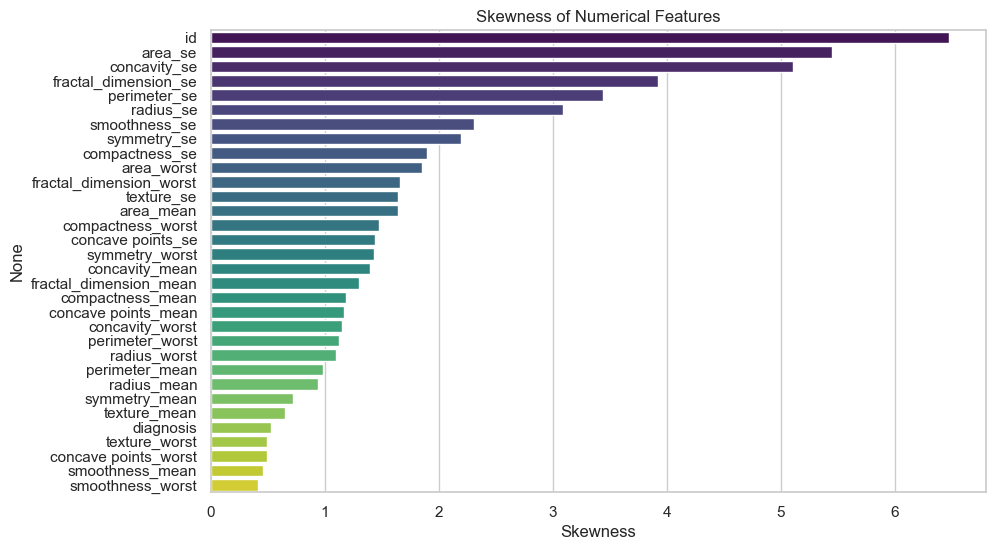

In [ ]:
skews = numeric_df.skew().sort_values(ascending=False)
sns.barplot(x=skews.values, y=skews.index, palette="viridis")
plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness")
plt.show()

based on the output above:
- many features are **positively skewed**, especially those ending in _se
- **smoothness_mean, smoothness_worst, and texture_worst** have little skewness. their distribution is close to normal (gaussian)

## Kurtosis


- Kurtosis measures the "tailedness" of a distribution
- It tells you how heavy or light the tails of the distribution are compared to a normal distribution
- High kurtosis (>3): **Heavy tails, more outliers**
- Low kurtosis (<3): **Light tails, fewer outliers**
- Normal distribution kurtosis ≈ 3

C:\Users\Beyza\AppData\Local\Temp\ipykernel_11128\2513673273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kurt_vals.values, y=kurt_vals.index, palette="magma")


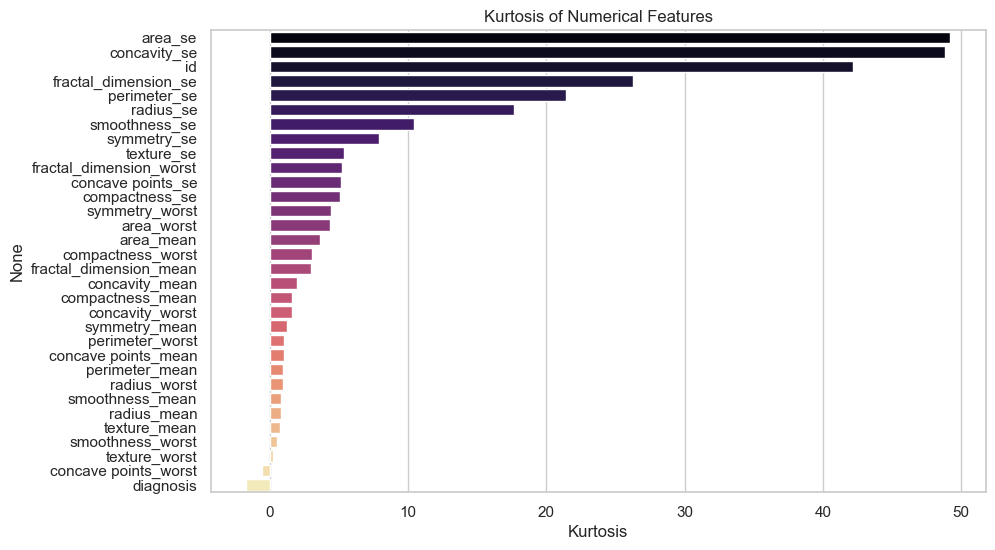

In [46]:
# 16. Kurtosis
kurt_vals = numeric_df.kurt().sort_values(ascending=False)
sns.barplot(x=kurt_vals.values, y=kurt_vals.index, palette="magma")
plt.title("Kurtosis of Numerical Features")
plt.xlabel("Kurtosis")
plt.show()

based on the output above:
- top 8 features show extreme kurtosis
- this means that they have very heavy tail and they can contain outliers

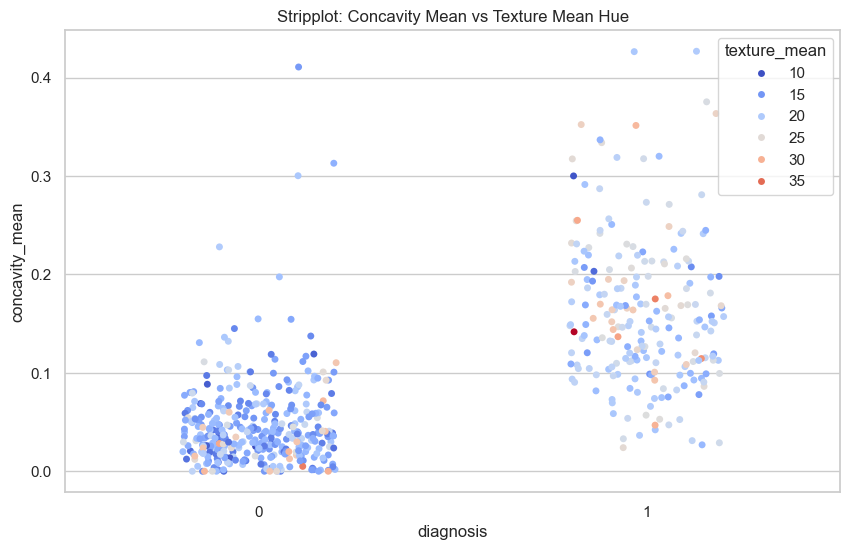

In [47]:
# 17. Multivariate Strip Plot
sns.stripplot(data=df, x='diagnosis', y='concavity_mean', jitter=0.2, hue='texture_mean', palette='coolwarm')
plt.title("Stripplot: Concavity Mean vs Texture Mean Hue")
plt.show()

In [43]:
# 13. Redundancy Check (Highly Correlated Pairs)
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Feature Correlations:\n", get_top_correlations(numeric_df))

Top Feature Correlations:
 radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
radius_se        perimeter_se       0.972794
perimeter_mean   perimeter_worst    0.970387
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
dtype: float64


Several features exhibit extremely high positive correlations, especially among radius, perimeter, and area measurements (e.g., radius_mean and perimeter_mean with r ≈ 0.998).